In [39]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_excel('./dados bootcamp/TIPS-GORJETA/tips.xlsx')
df['smoker'] = df['smoker'].map({"Yes": 1, "No": 0})

In [73]:
df.head()

,total_bill,tip,sex,smoker,day,time,size_of_group
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_bill     244 non-null    float64
 1   tip            244 non-null    float64
 2   sex            244 non-null    object 
 3   smoker         244 non-null    object 
 4   day            244 non-null    object 
 5   time           244 non-null    object 
 6   size_of_group  244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [43]:
df.describe()

,total_bill,tip,size_of_group
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [44]:
#media de tips
df.tip.mean()

2.99827868852459

In [45]:
#media de total_bill
df.total_bill.mean()

19.78594262295082

In [46]:
#quantidade de fumantes e nao fumantes
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

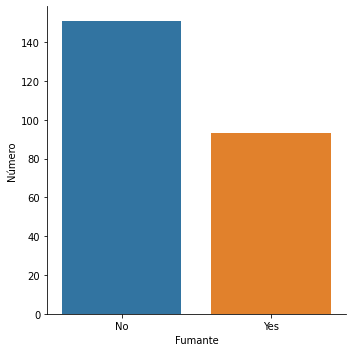

In [47]:
#plot de fumantes e nao fumantes
sns.catplot(x='smoker', kind='count',data=df)
plt.xlabel('Fumante')
plt.ylabel('Número')
plt.tight_layout()

In [48]:
#dias da semana e quantidade de clientes
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

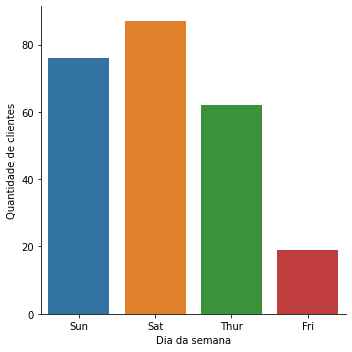

In [49]:
#plot dos dias da semana/quantidade de clientes
sns.catplot(x='day', kind='count',data=df)
plt.xlabel('Dia da semana')
plt.ylabel('Quantidade de clientes')
plt.tight_layout()

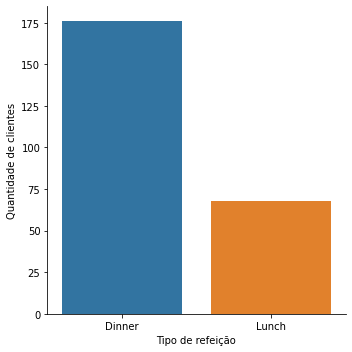

In [50]:
#plot dos tipos de refeição/quantidade de clientes
sns.catplot(x='time', kind='count', data=df)
plt.xlabel('Tipo de refeição')
plt.ylabel('Quantidade de clientes')
plt.tight_layout()

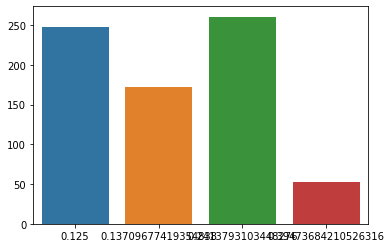

In [100]:
# Relação entre presença de fumantes e gorjeta
days = ["Thur", "Fri", "Sat", "Sun"]
prop_smokers = []
tips = []
for day in days:
    clients = df.loc[df['day'] == day, ['smoker', 'tip']]
    smokers = clients.smoker.values.sum()
    prop_smokers.append( smokers / clients.size )
    tips.append( clients.tip.values.sum() )

# Visualizando
sns.barplot(x=prop_smokers, y=tips)
plt.show()

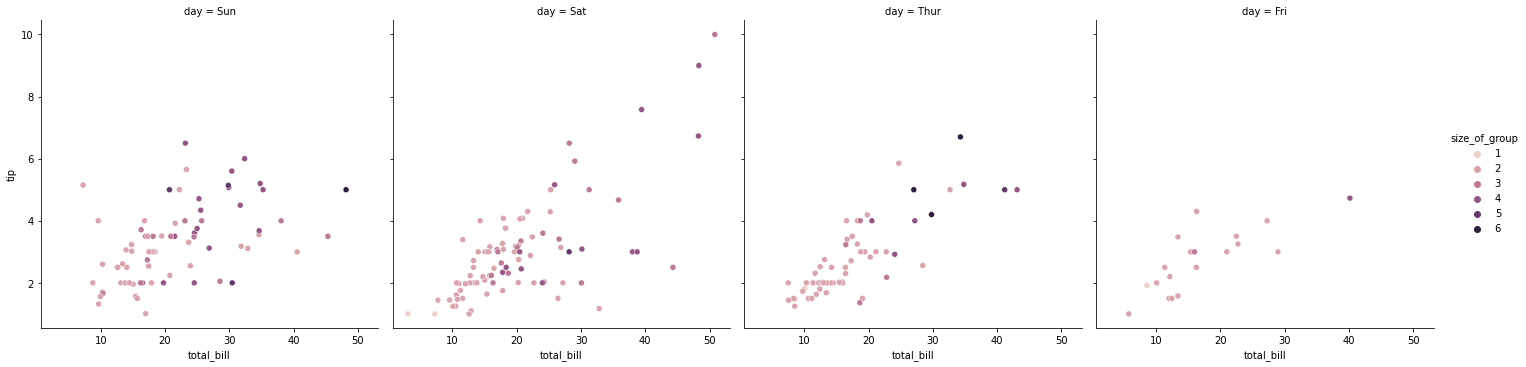

In [95]:
# Relação entre tamanho do grupo e gorjeta
sns.relplot(x='total_bill', y='tip', hue='size_of_group', col='day', data=df)

* Em geral pessoas em grupos menores dão gorjetas menores

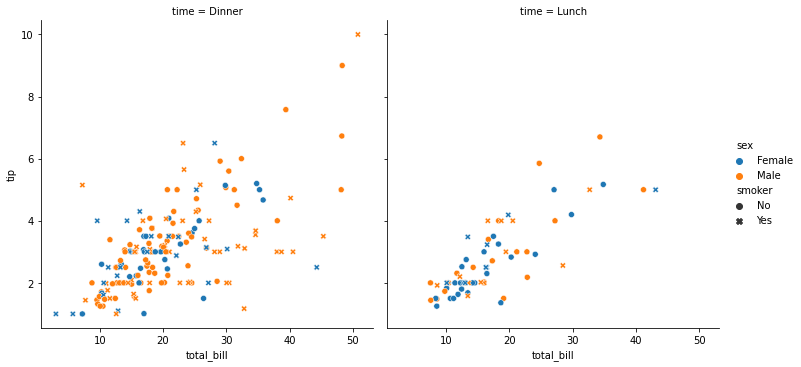

In [53]:
#relação entre total_bill, tip, smoker, sex

sns.relplot(x="total_bill", y="tip", hue="sex", style="smoker", col='time',data=df);

* Pessoas do sexo masculino são maioria no jantar, enquanto do sexo feminino são maioria no almoço.
* Pessoas do sexo masculino e não fumantes pagam a conta e gorjeta maiores.

## Regressão Linear Simples

In [107]:
# importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [103]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LinearRegression

# 2. Instanciar e escolher os hyperparameters
model = LinearRegression()

# 3. Separar os dados 
X = df[['total_bill', 'smoker',  'size_of_group']]
y = df['tip']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

Um modelo de *Machine Learning* deve ser quantificável, seja em termos de desempenho ou precisão. No caso de modelos de Regressão, 
Vamos testar o desempenho do modelo em cima do nosso conjunto de testes usando as métricas abaixo:

* ***R-Squared -*** métrica popularmente usada para calcular a acurácia do seu modelo. Basicamente, calcula como o seu modelo se encaixa aos seus dados, quantificando a qualidade entre 0 e 1. No caso, a melhor pontuação que seu modelo pode atingir é 1.

* ***Mean Absolut Error (MAE) -*** é a média absoluta do erro, representada pela média das somas dos erros individuais (distâncias entre pontos e retas).

* ***Mean Squared Error (MSE) -*** é a média dos quadrados dos error e provavelmente a métrica mais conhecida. Tende a penalizar exponencialmente os erros, tratando diferentemente erros pequenos e grandes.

In [109]:
# avaliar o desempenho do modelo
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))


R2 Score:	 0.3021143290259001
MAE:		 0.6827768087558692
MSE:		 0.8069105022001674
